<a href="https://colab.research.google.com/github/HoseinNekouei/PyTorch_Binary-Prediction-of-Poisonous-Mushrooms/blob/main/Torch_binary_prediction_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Dataset**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir /content/data

In [3]:
!cp /content/drive/MyDrive/dataset/playground-series-s4e8_2.zip /content/data

In [4]:
!unzip /content/data/playground-series-s4e8_2.zip -d /content/data

Archive:  /content/data/playground-series-s4e8_2.zip
  inflating: /content/data/sample_submission.csv  
  inflating: /content/data/test.csv  
  inflating: /content/data/train.csv  


In [5]:
# !rm /content/test.csv
# !rm /content/train.csv
# !rm /content/sample_submission.csv

# **Import Library**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.metrics import matthews_corrcoef

In [7]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [37]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# **Step1: Data**




## **Preprocessing**

### *Load Train set*




In [9]:
train_df= pd.read_csv('/content/data/train.csv')
train_df

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u


### *NaN*

In [10]:
train_df= train_df.drop(columns= ['id'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), object(18)
memory usage: 499.4+ MB


In [11]:
train_df.isna().mean()

,0
class,0.000000
cap-diameter,0.000001
cap-shape,0.000013
cap-surface,0.215282
cap-color,0.000004
does-bruise-or-bleed,0.000003
gill-attachment,0.168093
gill-spacing,0.403740
gill-color,0.000018
stem-height,0.000000


In [12]:
missing_treshold= 0.85

high_missing_columns= train_df.columns[train_df.isna().mean() > missing_treshold]
high_missing_columns

train_df= train_df.drop(columns= high_missing_columns)
train_df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,w,f,f,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,y,o,t,z,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,s,n,f,f,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,w,f,f,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,w,f,f,g,a


In [13]:
mode_values= train_df.mode()
mode_values= mode_values.loc[0].to_dict()
mode_values

{'class': 'p',
 'cap-diameter': 1.49,
 'cap-shape': 'x',
 'cap-surface': 't',
 'cap-color': 'n',
 'does-bruise-or-bleed': 'f',
 'gill-attachment': 'a',
 'gill-spacing': 'c',
 'gill-color': 'w',
 'stem-height': 5.24,
 'stem-width': 2.41,
 'stem-surface': 's',
 'stem-color': 'w',
 'has-ring': 'f',
 'ring-type': 'f',
 'habitat': 'd',
 'season': 'a'}

In [14]:
median_values= train_df.median(numeric_only= True).to_dict()
median_values

{'cap-diameter': 5.75, 'stem-height': 5.88, 'stem-width': 9.65}

In [15]:
list(median_values.keys())

['cap-diameter', 'stem-height', 'stem-width']

In [16]:
for column in train_df:
  if train_df[column].isna().any():
    if train_df[column].dtype== 'object':
      train_df[column]= train_df[column].fillna(mode_values[column])
    else:
      train_df[column]= train_df[column].fillna(median_values[column])

train_df.isna().median()

,0
class,0.0
cap-diameter,0.0
cap-shape,0.0
cap-surface,0.0
cap-color,0.0
does-bruise-or-bleed,0.0
gill-attachment,0.0
gill-spacing,0.0
gill-color,0.0
stem-height,0.0


In [17]:
train_df[train_df.isna().any(axis=1)]

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season


### *Split Dataframe to train and validation*

In [18]:
num_samples, num_features= train_df.shape
num_features-= 1
num_classes= len(train_df['class'].unique())
print(f'num_sample: {num_samples}, num_features: {num_features}, num_classes: {num_classes}')

num_sample: 3116945, num_features: 16, num_classes: 2


In [19]:
train_df, val_df= train_test_split(train_df, test_size=0.2, random_state=42, stratify= train_df['class'])
print(f'train_df: {train_df.shape}, val_df: {val_df.shape}')

train_df: (2493556, 17), val_df: (623389, 17)


### *Encoding*

In [20]:
ordinal_encoder= OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value= -1)
cat_col_train= train_df.select_dtypes(include=['object']).columns

print(cat_col_train)

train_df[cat_col_train]= ordinal_encoder.fit_transform(train_df[cat_col_train].astype(str))
val_df[cat_col_train]= ordinal_encoder.transform(val_df[cat_col_train].astype(str))

print(train_df.head(2))


Index(['class', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-surface', 'stem-color', 'has-ring', 'ring-type', 'habitat',
       'season'],
      dtype='object')
         class  cap-diameter  cap-shape  cap-surface  cap-color  \
586767     1.0          4.95       61.0         69.0       61.0   
2665706    1.0          1.47       39.0         74.0       59.0   

         does-bruise-or-bleed  gill-attachment  gill-spacing  gill-color  \
586767                    8.0             36.0          22.0        53.0   
2665706                   8.0             36.0          22.0        37.0   

         stem-height  stem-width  stem-surface  stem-color  has-ring  \
586767          3.80       12.36          43.0        47.0       4.0   
2665706         5.23        3.09          43.0        45.0       4.0   

         ring-type  habitat  season  
586767        14.0     20.0     0.0  
2665706       14.0     20.

In [21]:
# # Delete unused variable
# del train_df

# # Force  garbage collection
# import gc
# gc.collect()

In [22]:
# Check current RAM usage
import psutil
ram_usage = psutil.virtual_memory()
print(f"Used RAM: {ram_usage.used / (1024 ** 3):.2f} GB")
print(f"Available RAM: {ram_usage.available / (1024 ** 3):.2f} GB")

Used RAM: 3.23 GB
Available RAM: 9.13 GB


### *Normalization*

In [23]:
scaler= StandardScaler()
num_features_list= list(median_values.keys())
num_features_list

train_df[num_features_list]= scaler.fit_transform(train_df[num_features_list])
val_df[num_features_list]= scaler.transform(val_df[num_features_list])

train_df.head(2)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
586767,1.0,-0.292220,61.0,69.0,61.0,8.0,36.0,22.0,53.0,-0.943942,0.148783,43.0,47.0,4.0,14.0,20.0,0.0
2665706,1.0,-1.039734,39.0,74.0,59.0,8.0,36.0,22.0,37.0,-0.414434,-0.996164,43.0,45.0,4.0,14.0,20.0,2.0


### *HiTorch*

In [24]:
X_train = train_df.drop(columns=['class'], axis=1).values
y_train= train_df['class'].values.reshape(-1,1)

X_val= val_df.drop(columns=['class'], axis=1).values
y_val= val_df['class'].values.reshape(-1, 1)

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((2493556, 16), (2493556, 1), (623389, 16), (623389, 1))

In [25]:
X_train= torch.tensor(X_train, dtype= torch.float32)
y_train= torch.tensor(y_train, dtype= torch.float32)

X_val= torch.tensor(X_val, dtype= torch.float32)
y_val= torch.tensor(y_val, dtype= torch.float32)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_train[1]

(torch.Size([2493556, 16]),
 torch.Size([2493556, 1]),
 torch.Size([623389, 16]),
 torch.Size([623389, 1]),
 tensor([-1.0397, 39.0000, 74.0000, 59.0000,  8.0000, 36.0000, 22.0000, 37.0000,
         -0.4144, -0.9962, 43.0000, 45.0000,  4.0000, 14.0000, 20.0000,  2.0000]))

In [26]:
train_set= TensorDataset(X_train, y_train)
val_set= TensorDataset(X_val, y_val)

X_train.shape, y_train.shape, X_val.shape, y_val.shape,

(torch.Size([2493556, 16]),
 torch.Size([2493556, 1]),
 torch.Size([623389, 16]),
 torch.Size([623389, 1]))

In [27]:
train_loader= DataLoader(train_set, batch_size=256, shuffle= True)
val_loader= DataLoader(val_set, batch_size= 256)

# **Step2: Model**

In [29]:
nf_hidden_layer1= 4 * num_features
nf_hidden_layer2= 2 * num_features

model = nn.Sequential(
    nn.Linear(in_features= num_features, out_features= nf_hidden_layer1),
    nn.ReLU(),
    nn.Linear(in_features= nf_hidden_layer1, out_features= nf_hidden_layer2),
    nn.ReLU(),
    nn.Linear(nf_hidden_layer2, num_classes-1),
    nn.Sigmoid()
)

model.to(device)

Sequential(
  (0): Linear(in_features=16, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=1, bias=True)
  (5): Sigmoid()
)

In [48]:
# x_batch, y_batch= next(iter(train_loader))
# x_batch.shape, y_batch.shape

#    #GPU
# x_batch = x_batch.to(device)
# y_batch= y_batch.to(device)
# # y_batch[:10]

# y_hat= model(x_batch)
# y_hat[:10]


tensor([[0.5416],
        [0.4226],
        [0.6516],
        [0.7384],
        [0.4718],
        [0.2690],
        [0.4001],
        [0.5343],
        [0.4432],
        [0.7844]], device='cuda:0', grad_fn=<SliceBackward0>)

# **Step3: Loss function**

In [49]:
loss_fn= nn.BCELoss()
loss_fn

BCELoss()

# **Step4: Optimizer**

In [50]:
opt= torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
opt

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

# **Step5: Train loop**

In [52]:
def matthews_correlation_coefficient(y_true, y_pred):
    """
    Calculate Matthews Correlation Coefficient (MCC) on GPU using PyTorch.

    Args:
        y_true (torch.Tensor): Ground truth labels (binary, 0 or 1).
        y_pred (torch.Tensor): Predicted labels (binary, 0 or 1).

    Returns:
        mcc (torch.Tensor): MCC value.
    """

    # Calculate confusion matrix components
    TP = ((y_true == 1) & (y_pred == 1)).sum().float()
    TN = ((y_true == 0) & (y_pred == 0)).sum().float()
    FP = ((y_true == 0) & (y_pred == 1)).sum().float()
    FN = ((y_true == 1) & (y_pred == 0)).sum().float()

    # Calculate numerator and denominator
    numerator = (TP * TN) - (FP * FN)
    denominator = torch.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

    # Handle division by zero
    if denominator == 0:
        return torch.tensor(0.0, device=y_true.device)
    else:
        return numerator / denominator

In [32]:
best_loss_val = 10000
loss_train_hist, loss_val_hist =[], []
acc_train_hist, acc_val_hist= [], []

In [55]:
epochs= 20

for epoch in range(epochs):
  mean_loss_train, mean_acc_train, train_mcc= 0, 0, 0
  mean_loss_val, mean_acc_val, val_mcc= 0, 0, 0

  for x_batch, y_batch in train_loader:

    #GPU
    x_batch = x_batch.to(device)
    y_batch= y_batch.to(device)

    #model
    y_hat= model(x_batch)

    #loss
    loss= loss_fn(y_hat, y_batch)

    # gradient
    loss.backward()

    # update
    opt.step()
    opt.zero_grad()

    mean_loss_train += loss.item() * len(x_batch)
    mean_acc_train += torch.sum(y_hat.round() == y_batch).item()
    # train_mcc += matthews_correlation_coefficient(y_batch, y_hat.round())

  mean_loss_train /= len(train_set)
  mean_acc_train /= len(train_set)
  # train_mcc /= len(train_set)
  loss_train_hist.append(mean_loss_train)
  acc_train_hist.append(mean_acc_train)


  with torch.no_grad():
    for x_batch, y_batch in val_loader:

      #GPU
      x_batch = x_batch.to(device)
      y_batch= y_batch.to(device)

      y_hat= model(x_batch)

      loss= loss_fn(y_hat, y_batch)

      mean_loss_val += loss.item() * len(x_batch)
      mean_acc_val += torch.sum(y_hat.round() == y_batch).item()
      # val_mcc += matthews_correlation_coefficient(y_batch, y_hat.round())
      # print(f'Matthews Correlation Coefficient: {val_mcc:.3f}')

    mean_loss_val /= len(val_set)
    mean_acc_val /= len(val_set)
    # val_mcc /= len(val_set)
    loss_val_hist.append(mean_loss_val)
    acc_val_hist.append(mean_acc_val)

  print(f'epoch[{epoch}]: '
      f'Train_loss: {mean_loss_train:.3f} ,'
      f'Train_acc: {mean_acc_train:.3f} ,'
      # f'mcc: {train_mcc:.3f} '
      f'val_loss: {mean_loss_val:.3f} ,'
      f'val_acc: {mean_acc_val:.3f} ,'
      # f'mcc: {val_mcc:.3f}'
      )

  if mean_loss_val < best_loss_val:
    best_loss_val = mean_loss_val
    print('model saved!')
    print()
    torch.save(model,'best_model.pt')

epoch[0]: Train_loss: 0.271 ,Train_acc: 0.902 ,mcc: 0.000 val_loss: 0.267 ,val_acc: 0.903 ,mcc: 0.000
model saved!
epoch[1]: Train_loss: 0.253 ,Train_acc: 0.913 ,mcc: 0.000 val_loss: 0.248 ,val_acc: 0.914 ,mcc: 0.000
model saved!
epoch[2]: Train_loss: 0.240 ,Train_acc: 0.920 ,mcc: 0.000 val_loss: 0.233 ,val_acc: 0.923 ,mcc: 0.000
model saved!
epoch[3]: Train_loss: 0.230 ,Train_acc: 0.925 ,mcc: 0.000 val_loss: 0.220 ,val_acc: 0.933 ,mcc: 0.000
model saved!
epoch[4]: Train_loss: 0.223 ,Train_acc: 0.929 ,mcc: 0.000 val_loss: 0.221 ,val_acc: 0.930 ,mcc: 0.000
epoch[5]: Train_loss: 0.217 ,Train_acc: 0.932 ,mcc: 0.000 val_loss: 0.208 ,val_acc: 0.940 ,mcc: 0.000
model saved!
epoch[6]: Train_loss: 0.214 ,Train_acc: 0.934 ,mcc: 0.000 val_loss: 0.205 ,val_acc: 0.941 ,mcc: 0.000
model saved!
epoch[7]: Train_loss: 0.210 ,Train_acc: 0.937 ,mcc: 0.000 val_loss: 0.209 ,val_acc: 0.938 ,mcc: 0.000
epoch[8]: Train_loss: 0.206 ,Train_acc: 0.939 ,mcc: 0.000 val_loss: 0.205 ,val_acc: 0.937 ,mcc: 0.000
mode

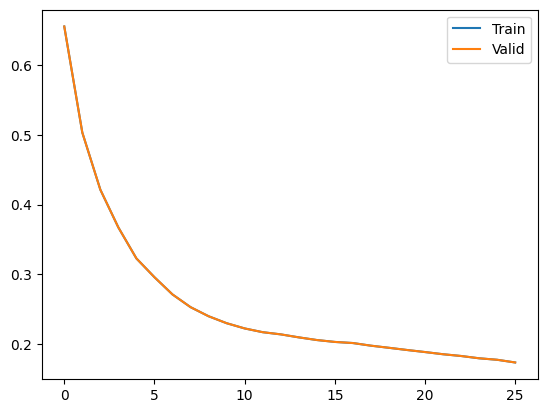

In [61]:
plt.plot(torch.arange(epochs), loss_train_hist)
plt.plot(torch.arange(epochs), loss_val_hist)

plt.legend(["Train", "Valid"]);

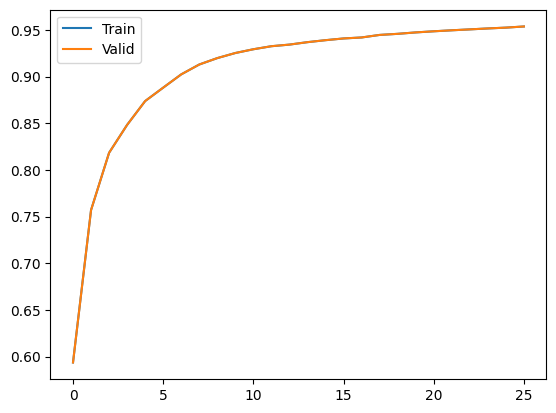

In [62]:
plt.plot(torch.arange(epochs), acc_train_hist)
plt.plot(torch.arange(epochs), acc_val_hist)
plt.legend(["Train", "Valid"]);